In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [8]:
#vector representation 
glove_model["lion"]

array([ 0.2918   , -0.30451  , -0.18643  , -0.12456  ,  0.59852  ,
        0.543    ,  0.16806  ,  1.0792   , -0.055115 , -0.20401  ,
       -0.10764  , -0.81728  , -0.20518  ,  0.52162  ,  0.37358  ,
        0.075588 ,  0.44998  ,  0.19819  , -0.017366 , -0.43582  ,
       -0.39421  ,  0.46885  ,  0.48778  ,  0.48085  ,  0.088282 ,
       -0.21437  ,  0.10376  , -0.15115  ,  0.14854  ,  0.65517  ,
        0.0078932, -0.85667  , -0.024476 ,  0.10032  , -0.68263  ,
       -0.39281  ,  0.34664  ,  0.30954  , -0.68735  ,  0.347    ,
       -0.078671 , -0.21691  , -0.43452  ,  0.30331  , -0.63428  ,
       -0.53864  ,  0.2968   ,  0.028856 ,  0.37429  ,  0.12612  ,
       -0.34203  , -0.50055  ,  0.10103  ,  0.21551  ,  0.28844  ,
        0.36301  ,  0.64173  ,  0.61683  ,  0.035685 ,  0.062093 ,
       -0.59562  ,  0.011796 ,  0.28576  ,  0.023435 ,  0.26298  ,
        0.018569 , -0.31712  , -0.5706   ,  0.47154  ,  0.37222  ,
       -0.0045898,  0.66711  , -0.082827 , -0.29561  , -0.1285

In [9]:
#print similar words
glove_model.most_similar("boy")

[('girl', 0.8272891044616699),
 ('boys', 0.681233286857605),
 ('kid', 0.655293345451355),
 ('man', 0.6208277940750122),
 ('teenage', 0.5973849296569824),
 ('child', 0.5952882766723633),
 ('teenager', 0.5896497368812561),
 ('father', 0.5800690054893494),
 ('girls', 0.574547290802002),
 ('son', 0.5726956129074097)]

In [10]:
#Analogy
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139932632446)]

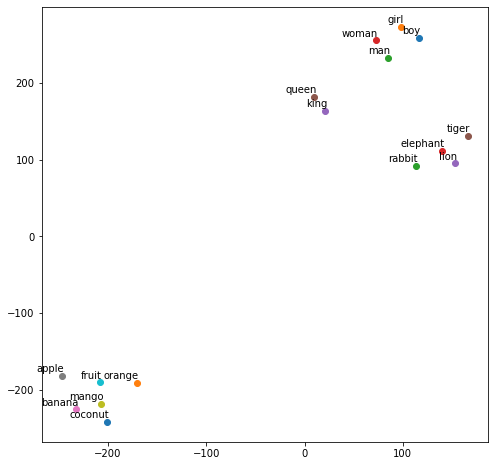

In [11]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange","rabbit","elephant","lion","tiger"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)